In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import os.path as path
import pandas as pd
import os
import wget

In [2]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [3]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Interpolacion.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [4]:
Data = pd.read_csv(Path_)
Data

,X,Y
0,1.4,0.400795
1,3.5,0.594128
2,5.6,0.298028


In [5]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)
print(X,Y)

[1.4 3.5 5.6] [0.40079549 0.5941281  0.29802796]


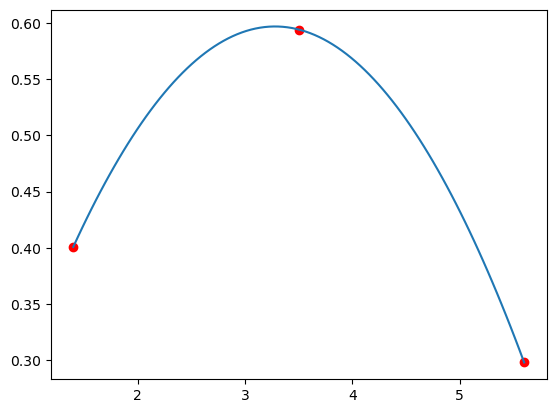

In [6]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)
plt.scatter(X,Y,c="r")
plt.plot(x,y)

In [7]:
polym = Interpolate(sym.Symbol("x",Real=True),X,Y)
polym.expand()

-0.0554912422401579*x**2 + 0.363970234266202*x + 2.77555756156289e-17

Ecuación de trayectoria:
$$y=tan(\theta)x+\frac{gx^2}{2V_0^2cos^2(\theta)}$$

In [8]:
theta = np.arctan(0.363970234266202)
theta #radianes

0.3490658503988656

In [9]:
0.3490658503988656*(180/np.pi) #grados

19.999999999999982

$$−0.0554912422401579= \frac{g}{2V_0^2cos^2\theta}$$
$$V_0=\sqrt{\frac{g}{2cos^2\theta \cdot −0.0554912422401579}}$$

In [10]:
g = -9.8

In [11]:
v_0 = np.sqrt((g)/(2*-0.0554912422401579*np.cos(theta)**2))
v_0

10.0